# Hardware Accelerator Analysis

# Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import datasets

Accelerator

In [51]:
df1 = pd.read_csv('DT_HDW_Acccelator_CPU.csv')
df2 = pd.read_csv('DT_HDW_Acccelator_GPU.csv')
df3 = pd.read_csv('DT_HDW_Acccelator_TPU.csv')

# Show  Datasets

In [52]:
df1.head(3)

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
0,Make_DTC,100000x1000,0.0000,8848.006038,8854.409580,6.403542,CPU
1,Pred1,defaults,0.9223,8860.881877,9924.362173,1063.489262,CPU
2,Pred2,max_depth,0.9265,9924.369420,9981.892829,57.523408,CPU


In [53]:
df2.head(3)

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
0,Make_DTC,100000x1000,0.00000,387.694548,396.203974,8.509426,T4_GPU
1,Pred1,defaults,0.92165,401.489196,1257.312410,855.827618,T4_GPU
2,Pred2,max_depth,0.92650,1257.318798,1301.381751,44.062953,T4_GPU


In [54]:
df3.head(3)

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
0,Make_DTC,100000x1000,0.00000,951.614606,956.617744,5.003139,v2_8_TPU
1,Pred1,defaults,0.92125,961.342790,1780.231199,818.892073,v2_8_TPU
2,Pred2,max_depth,0.92650,1780.235226,1822.625985,42.390759,v2_8_TPU


# Concatenate Dataset

In [55]:
df1

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
0,Make_DTC,100000x1000,0.00000,8848.006038,8854.409580,6.403542,CPU
1,Pred1,defaults,0.92230,8860.881877,9924.362173,1063.489262,CPU
2,Pred2,max_depth,0.92650,9924.369420,9981.892829,57.523408,CPU
3,Pred3,criterion,0.92395,9981.899340,10051.173956,69.274616,CPU
4,Pred4,min_samples_split,0.92395,10051.181201,10120.092821,68.911620,CPU
5,Pred5,min_samples_leaf,0.92395,10120.099469,10189.612863,69.513393,CPU
6,Pred6,min_impurity_decrease,0.92395,10189.623599,10259.845329,70.221730,CPU
7,Pred7,splitter,0.49400,10259.851350,10261.826093,1.974743,CPU
8,Pred8,max_features,0.49400,10261.832725,10262.166846,0.334121,CPU
9,Total_Time,defaults,0.00000,8860.872911,10262.174064,1401.301153,CPU


In [56]:
df = pd.concat([df1, df2, df3], axis=0, join='inner', ignore_index=True)

#Check Concatenate Datasets

In [57]:
df.iloc[:, -1].unique()

array(['CPU', 'T4_GPU', 'v2_8_TPU'], dtype=object)

In [58]:
df1.iloc[-1,5], df2.iloc[-1,5], df3.iloc[-1,5]

(np.float64(1401.301153022001),
 np.float64(1120.68856425),
 np.float64(1071.774104305))

In [59]:
df1.columns

Index(['Model_Name', 'Parameters', 'Accuracy', 'Start_Time', 'End_Time',
       'Execution Time', 'Hardware_Accelerator'],
      dtype='object')

# Build Plot

## Average Execution Time

<Axes: xlabel='Hardware_Accelerator', ylabel='Execution Time'>

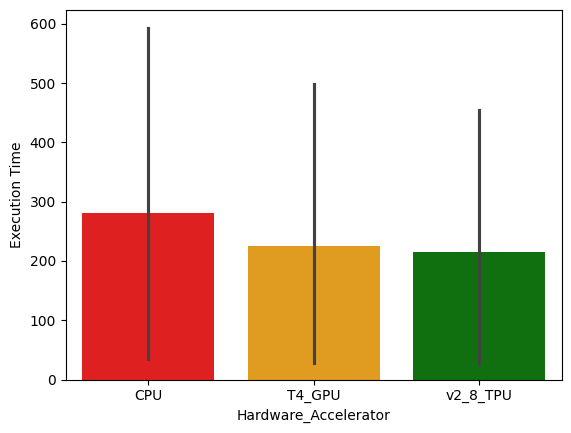

In [60]:
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df1, color='red')
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df2, color='orange')
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df3, color='green')

## Prediction 1 Runtime for 3 hardware

<Axes: xlabel='Hardware_Accelerator', ylabel='Execution Time'>

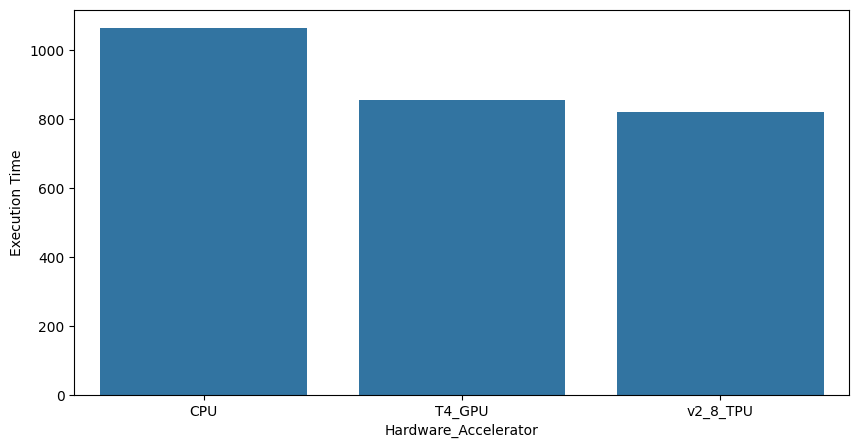

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df[df['Model_Name'] == 'Pred1'])

## Total Runtime

In [62]:
df[df['Model_Name'] == 'Total_Time']

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
9,Total_Time,defaults,0.0,8860.872911,10262.174064,1401.301153,CPU
19,Total_Time,defaults,0.0,401.484791,1522.173356,1120.688564,T4_GPU
29,Total_Time,defaults,0.0,961.339126,2033.113230,1071.774104,v2_8_TPU


<Axes: xlabel='Hardware_Accelerator', ylabel='Execution Time'>

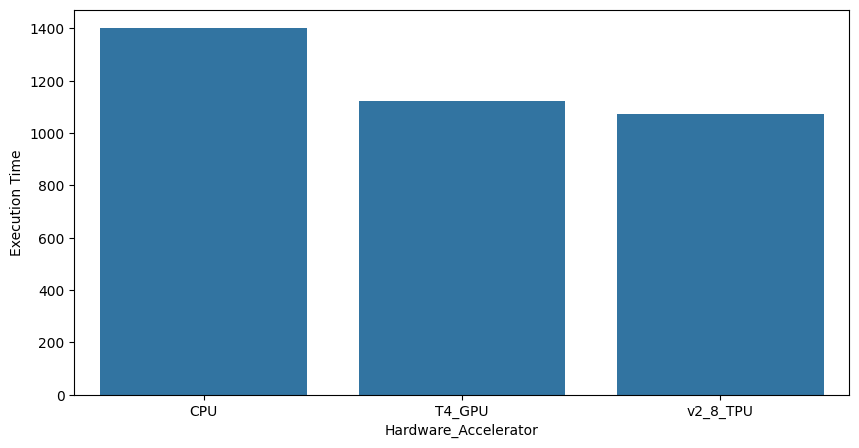

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df[df['Model_Name'] == 'Total_Time'])

## Dataset Creation RunTimes

In [64]:
df[df['Model_Name'] == 'Make_DTC']

,Model_Name,Parameters,Accuracy,Start_Time,End_Time,Execution Time,Hardware_Accelerator
0,Make_DTC,100000x1000,0.0,8848.006038,8854.409580,6.403542,CPU
10,Make_DTC,100000x1000,0.0,387.694548,396.203974,8.509426,T4_GPU
20,Make_DTC,100000x1000,0.0,951.614606,956.617744,5.003139,v2_8_TPU


<Axes: xlabel='Hardware_Accelerator', ylabel='Execution Time'>

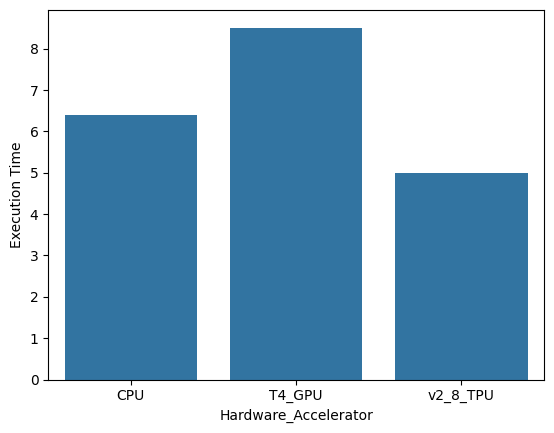

In [65]:
sns.barplot(x='Hardware_Accelerator', y='Execution Time', data=df[df['Model_Name'] == 'Make_DTC'])